In [1]:
!pip install --quiet umap-learn

Let's load up our data and remove some columns we won't use.

In [2]:
import pandas as pd

DATA = '/kaggle/input/super-heroes-dataset/superheroes_data.csv'

df = pd.read_csv(filepath_or_buffer=DATA, index_col=['id']).drop(columns=['aliases', 'occupation', 'relatives', 'group-affiliation', 'url'])
df.head()

,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,place-of-birth,first-appearance,publisher,alignment,gender,race,height,weight,eye-color,hair-color,base
id,,,,,,,,,,,,,,,,,,,,
1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good,Male,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,-
2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good,Male,Icthyo Sapien,"[""6'3"", '191 cm']","['145 lb', '65 kg']",Blue,No Hair,-
3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,Ungara,"Showcase #22 (October, 1959)",DC Comics,good,Male,Ungaran,"[""6'1"", '185 cm']","['200 lb', '90 kg']",Blue,No Hair,Oa
4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,No alter egos found.,"Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,bad,Male,Human / Radiation,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Green,No Hair,Mobile
5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,No alter egos found.,Within Eternity,Fantastic Four Annual #2001,Marvel Comics,bad,Male,Cosmic Entity,"['-', '0 cm']","['- lb', '0 kg']",Blue,Black,-


Let's use UMAP to cluster our data based on the numerical columns.

In [3]:
COLUMNS = ['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']

We have some missing data; we're going to fill them in with zeros. Then let's use UMAP to place them in the x/y plane.

In [4]:
import arrow
from umap import UMAP

time_start = arrow.now()
reducer = UMAP(random_state=2024, verbose=False, n_jobs=1, low_memory=False, n_epochs=201)
df[['x', 'y']] = reducer.fit_transform(X=df[COLUMNS].fillna(value=0.0))
print('done with UMAP in {}'.format(arrow.now() - time_start))

done with UMAP in 0:00:11.071622


We have three, maybe four clusters, but we don't have many options for features they may be clustering on. Let's just take a look at the ones we have that have relatively few choices.

<Axes: xlabel='x', ylabel='y'>

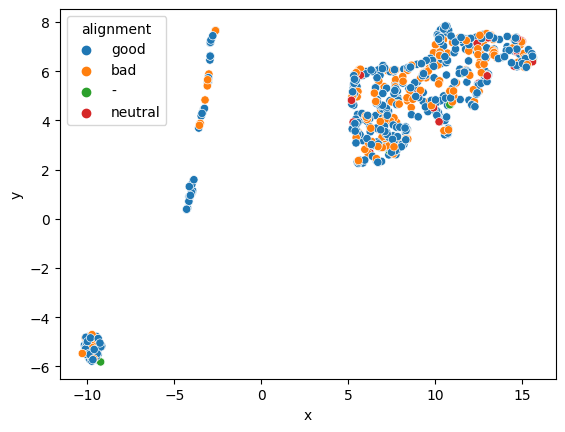

In [5]:
from seaborn import scatterplot

scatterplot(data=df, x='x', y='y', hue='alignment')

<Axes: xlabel='x', ylabel='y'>

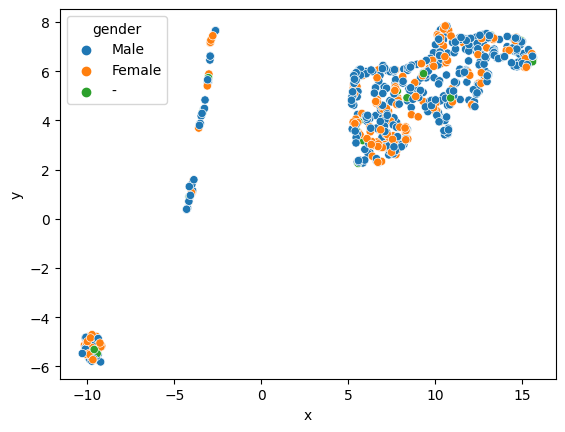

In [6]:
scatterplot(data=df, x='x', y='y', hue='gender')